## Analyzing the Effects of Top/Bottom Coding on The Accuracy of Global LGBM Forecasts

***

## Import Modules

In [1]:
# general modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# light gradient boosting model package
import lightgbm as lgb

##### the `helper_functions.py` file contains many custom functions we wrote to aid in our analysis
##### `full_coding_analysis` combines all of the following - train-test split data,
##### data protection, train models, compare accuracies, return accuracy results
from helper_functions import full_coding_analysis
from helper_functions import *

# import detrender and deseasonalizer
from sktime.transformations.series.detrend import Detrender
# nice time series plots
from sktime.utils.plotting import plot_series

## Import data

In [2]:
# import weekly finance time series
Y = np.genfromtxt("../../Data/Train/Clean/weekly_finance_clean.csv", delimiter = ',', skip_header = 1)
Y = pd.DataFrame(Y)

This file experiments with applying top and bottom coding to detrended data (intuition suggests this type of data is a better candidate for this type of protection than the original finance series data) so we remove the trend from the finance data here.

In [3]:
detrender = Detrender()
detrended_series = [detrender.fit_transform(series) for _ , series in Y.iterrows()]

In [4]:
detrended_series = [i+np.abs(np.min(i))+1.0 for i in detrended_series]
Y = pd.concat(detrended_series, axis=1).T

***

We obtain results for a combination of forecast horizons, coding types (top and bottom), coding percentages, and model complexities:

* Forecast Horizons: (1, 5, 15)
* Coding Types: (Top, Bottom)
* Coding Percentages: (0.10, 0.20, 0.40)
* Model complexities (window length): (10, 20, 40)

## Simple Model (window length = 10)

In [5]:
forecaster = lgb.LGBMRegressor()
window_length = 10

In [6]:
results_dict_10 = {}
fcasts_10 = {}
fcasts_protected_10 = {}
tests = {}
types = ["Top", "Bottom"]
percentages = [0.10, 0.20, 0.40]
horizons = [1, 20]

In [7]:
for t in types:
    for p in percentages:
        for h in horizons:
            idx = "h="+str(h)+", "+t+" "+str(p)
            results_dict_10[idx], tests[idx], fcasts_10[idx], fcasts_protected_10[idx] = full_coding_analysis(time_series_data=Y,
                                                                                                              forecasting_model=forecaster,
                                                                                                              forecast_horizon=h, 
                                                                                                              coding_type=t, 
                                                                                                              coding_percentage=p, 
                                                                                                              window_length=window_length)

In [8]:
results_dict_10

{'h=1, Top 0.1': {'Mean Accuracies': array([34.57, 34.57]),
  'Protected Mean Accuracies:': array([36.75, 36.75]),
  '% Change Mean accuracy:': array([-6.3, -6.3]),
  '% Change Median accuracy:': array([-20.91, -20.91]),
  '% Forecasted Points adjusted downward:': 35.370000000000005,
  '% Forecasted Points adjusted upward:': 64.63,
  '% Series with improved accuracy:': array([43.29, 43.29]),
  '% Series with reduced accuracy:': array([56.71, 56.71]),
  'Original Mean Absolute Error Upward Adjusted:': 35.099999999999994,
  'Original Mean Absolute Error Downward Adjusted:': 33.6,
  'Protected Mean Absolute Error Upward Adjusted:': 36.25,
  'Protected Mean Absolute Error Downward Adjusted:': 37.65},
 'h=20, Top 0.1': {'Mean Accuracies': array([48.5 , 58.94]),
  'Protected Mean Accuracies:': array([45.47, 55.66]),
  '% Change Mean accuracy:': array([6.24, 5.57]),
  '% Change Median accuracy:': array([12.49,  9.19]),
  '% Forecasted Points adjusted downward:': 42.1,
  '% Forecasted Points a

In [9]:
# plot the accuracy changes for a given scenario
fcasts = fcasts_10["h=20, Bottom 0.1"]
fcasts_protected = fcasts_protected_10["h=20, Bottom 0.1"]
Test = tests["h=20, Bottom 0.1"]

In [10]:
maes_orig = mean_absolute_error(Test, fcasts, multioutput="raw_values")
maes_protected = mean_absolute_error(Test, fcasts_protected, multioutput="raw_values")
rmses_orig = mean_squared_error(Test, fcasts, square_root=True, multioutput="raw_values")
rmses_protected = mean_squared_error(Test, fcasts_protected, square_root=True, multioutput="raw_values")

In [11]:
pct_maes = (maes_orig-maes_protected)/maes_orig
pct_rmses = (rmses_orig-rmses_protected)/rmses_orig

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         3.,  7., 14., 45., 73., 14.,  5.]),
 array([-4.60601520e+00, -4.33482504e+00, -4.06363487e+00, -3.79244470e+00,
        -3.52125454e+00, -3.25006437e+00, -2.97887420e+00, -2.70768404e+00,
        -2.43649387e+00, -2.16530370e+00, -1.89411353e+00, -1.62292337e+00,
        -1.35173320e+00, -1.08054303e+00, -8.09352868e-01, -5.38162701e-01,
        -2.66972534e-01,  4.21763287e-03,  2.75407800e-01,  5.46597966e-01,
         8.17788133e-01]),
 <BarContainer object of 20 artists>)

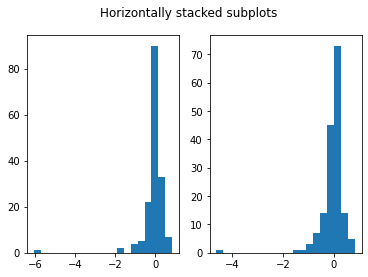

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.hist(pct_maes, bins=20)
ax2.hist(pct_rmses, bins=20)

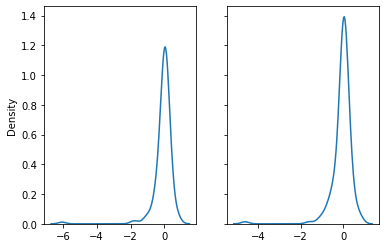

In [13]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.kdeplot(x=pct_maes, ax=ax1)
sns.kdeplot(x=pct_rmses, ax=ax2)
plt.show()

***
***

## 'Medium' Model (window length = 20)

In [14]:
forecaster = lgb.LGBMRegressor()
window_length = 20

In [15]:
results_dict_20 = {}
fcasts_20 = {}
fcasts_protected_20 = {}
tests = {}
types = ["Top", "Bottom"]
percentages = [0.10, 0.20, 0.40]
horizons = [1, 20]

In [16]:
for t in types:
    for p in percentages:
        for h in horizons:
            idx = "h="+str(h)+", "+t+" "+str(p)
            results_dict_20[idx], tests[idx], fcasts_20[idx], fcasts_protected_20[idx] = full_coding_analysis(time_series_data=Y,
                                                                                                              forecasting_model=forecaster,
                                                                                                              forecast_horizon=h, 
                                                                                                              coding_type=t, 
                                                                                                              coding_percentage=p, 
                                                                                                              window_length=window_length)

In [17]:
results_dict_20

{'h=1, Top 0.1': {'Mean Accuracies': array([34.31, 34.31]),
  'Protected Mean Accuracies:': array([36.48, 36.48]),
  '% Change Mean accuracy:': array([-6.34, -6.34]),
  '% Change Median accuracy:': array([-19.24, -19.24]),
  '% Forecasted Points adjusted downward:': 41.46,
  '% Forecasted Points adjusted upward:': 58.540000000000006,
  '% Series with improved accuracy:': array([42.68, 42.68]),
  '% Series with reduced accuracy:': array([57.32, 57.32]),
  'Original Mean Absolute Error Upward Adjusted:': 34.31,
  'Original Mean Absolute Error Downward Adjusted:': 34.300000000000004,
  'Protected Mean Absolute Error Upward Adjusted:': 36.05,
  'Protected Mean Absolute Error Downward Adjusted:': 37.1},
 'h=20, Top 0.1': {'Mean Accuracies': array([48.15, 59.46]),
  'Protected Mean Accuracies:': array([47.18, 58.43]),
  '% Change Mean accuracy:': array([2.01, 1.75]),
  '% Change Median accuracy:': array([4.39, 6.38]),
  '% Forecasted Points adjusted downward:': 42.93,
  '% Forecasted Points 

***
***

## More Complex Model (window length = 40)

In [18]:
forecaster = lgb.LGBMRegressor()
window_length = 40

In [19]:
results_dict_40 = {}
fcasts_40 = {}
fcasts_protected_40 = {}
tests = {}
types = ["Top", "Bottom"]
percentages = [0.10, 0.20, 0.40]
horizons = [1, 20]

In [20]:
for t in types:
    for p in percentages:
        for h in horizons:
            idx = "h="+str(h)+", "+t+" "+str(p)
            results_dict_40[idx], tests[idx], fcasts_40[idx], fcasts_protected_40[idx] = full_coding_analysis(time_series_data=Y,
                                                                                                              forecasting_model=forecaster,
                                                                                                              forecast_horizon=h, 
                                                                                                              coding_type=t, 
                                                                                                              coding_percentage=p, 
                                                                                                              window_length=window_length)

In [21]:
results_dict_40

{'h=1, Top 0.1': {'Mean Accuracies': array([35.89, 35.89]),
  'Protected Mean Accuracies:': array([36.24, 36.24]),
  '% Change Mean accuracy:': array([-0.99, -0.99]),
  '% Change Median accuracy:': array([-6.86, -6.86]),
  '% Forecasted Points adjusted downward:': 42.68,
  '% Forecasted Points adjusted upward:': 57.32000000000001,
  '% Series with improved accuracy:': array([47.56, 47.56]),
  '% Series with reduced accuracy:': array([52.44, 52.44]),
  'Original Mean Absolute Error Upward Adjusted:': 22.03,
  'Original Mean Absolute Error Downward Adjusted:': 54.50000000000001,
  'Protected Mean Absolute Error Upward Adjusted:': 21.349999999999998,
  'Protected Mean Absolute Error Downward Adjusted:': 56.24},
 'h=20, Top 0.1': {'Mean Accuracies': array([47.57, 58.14]),
  'Protected Mean Accuracies:': array([45.13, 56.01]),
  '% Change Mean accuracy:': array([5.14, 3.66]),
  '% Change Median accuracy:': array([ 2.35, -5.72]),
  '% Forecasted Points adjusted downward:': 37.65,
  '% Foreca

In [22]:
original_forecasts = fcasts_40['h=20, Bottom 0.1']
protected_forecasts = fcasts_protected_40['h=20, Bottom 0.1']
test = tests['h=20, Bottom 0.1']

In [23]:
adjusted_up = original_forecasts < protected_forecasts
adjusted_up = pd.concat([row for i, row in adjusted_up.iterrows()])
adjusted_down = original_forecasts > protected_forecasts
adjusted_down = pd.concat([row for i, row in adjusted_down.iterrows()])

In [24]:
absolute_error_original = np.absolute(test - original_forecasts)
absolute_error_protected = np.absolute(test - protected_forecasts)

In [25]:
improved = absolute_error_original > absolute_error_protected
improved = pd.concat([row for i, row in improved.iterrows()])
worsened = absolute_error_original < absolute_error_protected
worsened = pd.concat([row for i, row in worsened.iterrows()])

In [26]:
np.mean(adjusted_down[improved])

0.28313253012048195

In [27]:
np.mean(adjusted_up[improved])

0.7168674698795181